### Abalone Case Study


**Problem Statement:<br>**
The age of abalone is determined by cutting the shell through the cone, staining it, <br>
and counting the number of rings through a microscope -- a boring and time-consuming task.<br>
Other measurements, which are easier to obtain, are used to predict the age. Further information,<br>
such as weather patterns and location (hence food availability) may be required to solve the problem.<br>

**Attribute Information<br>**

Given is the attribute name, attribute type, the measurement unit and a brief description.<br>
The number of rings is the value to predict. 
<br>
Name / Data Type / Measurement Unit / Description<br>
-----------------------------
Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years. <br>
<br>
You have to predict the rings of each abalone which will lead us to the age of that abalone. <br>

In [1]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.to_csv('adalone_20220427.csv')

In [3]:
df = pd.read_csv('adalone_20220427.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


This is Continuous data.

In [4]:
le = LabelEncoder()
le_sex = le.fit_transform(df.Sex)

In [5]:
df['le_sex'] = le_sex

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,le_sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
le_sex              int32
dtype: object

Sex column is of object data type to handle this we used Label_Encoder to change it to the numerical form.

In [8]:
df.loc[df["le_sex"] == 2]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,le_sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,2
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10,2
...,...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10,2
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2


## Checking Null values

In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
le_sex            0
dtype: int64

## Visualization of Data:

In [10]:
import seaborn as sns

In [11]:
# print(df[['Sex','le_sex']].loc[df['le_sex']==0].head(1))
# df[['Sex','le_sex']].loc[df['le_sex']==1].head(1),
# df[['Sex','le_sex']].loc[df['le_sex']==2].head(1)
#      )

df['le_sex'].groupby(df['Sex']).unique().apply(pd.Series)

,0
Sex,
F,0
I,1
M,2


Data Description:</br>
**F = 0</br>
I = 1 </br>
M = 2**

2    1528
1    1342
0    1307
Name: le_sex, dtype: int64


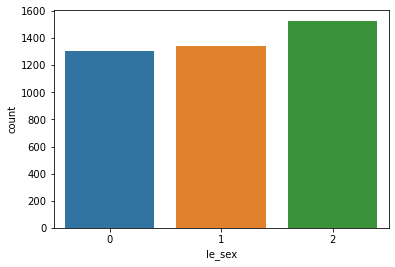

In [12]:
sns.countplot(data=df, x='le_sex')
print(df.le_sex.value_counts())

**These are descrete data columns**

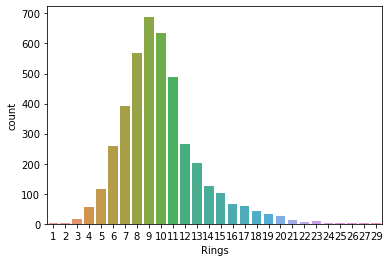

In [13]:
ax = sns.countplot(x='Rings',data=df)

All the other columns are populated with continuos data

In [14]:
df.columns.values

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings',
       'le_sex'], dtype=object)

## Checking the distribution of the continuous value of the columns

In [15]:
continuous_df = df[['Length','Diameter','Height','Whole weight','Shucked weight', 'Viscera weight','Shell weight' ]]

<AxesSubplot:xlabel='Length', ylabel='Density'>

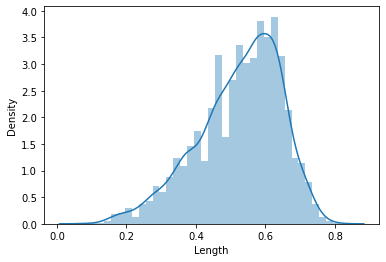

In [16]:
sns.distplot(df['Length'],kde=True)

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

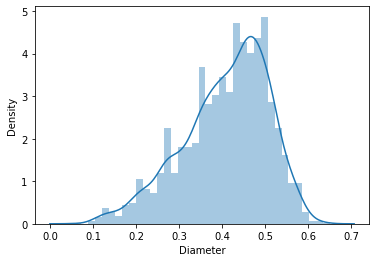

In [17]:
sns.distplot(df['Diameter'],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Density'>

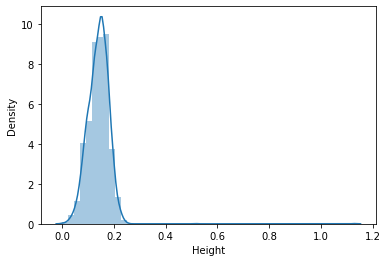

In [18]:
sns.distplot(df['Height'],kde=True)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

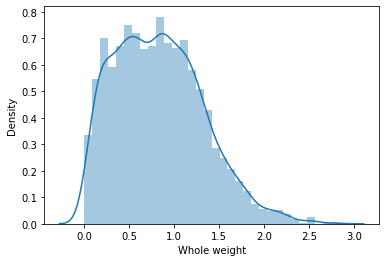

In [19]:
sns.distplot(df['Whole weight'], kde=True)

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

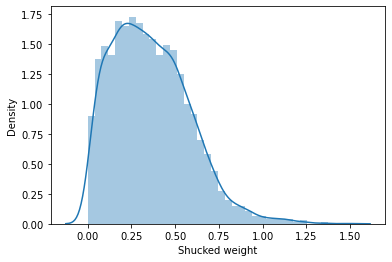

In [20]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

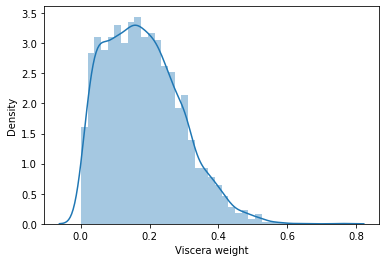

In [21]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

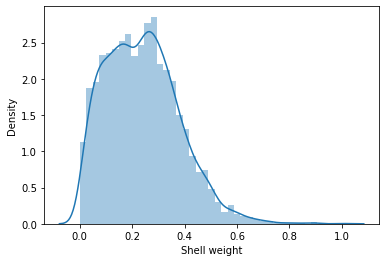

In [22]:
sns.distplot(df['Shell weight'],kde=True)

This data is not Normalized. Building blocks are going outside the curve.

<AxesSubplot:>

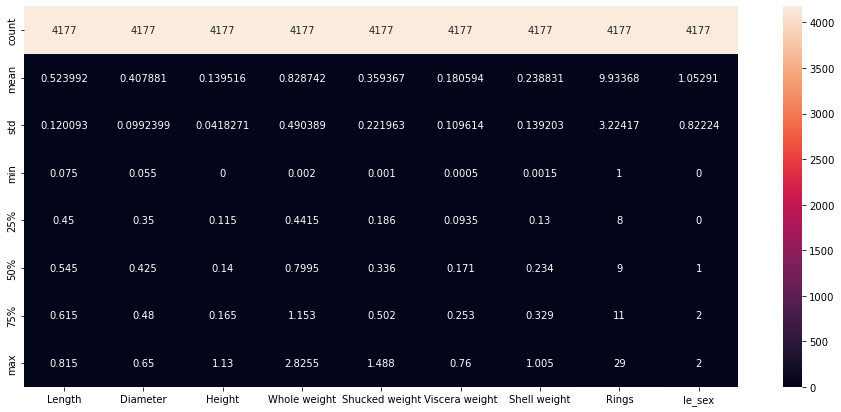

In [23]:
plt.figure(figsize = (16,7))
sns.heatmap(df.describe(), annot=True, fmt='0.6g')

## Correlation 

<AxesSubplot:>

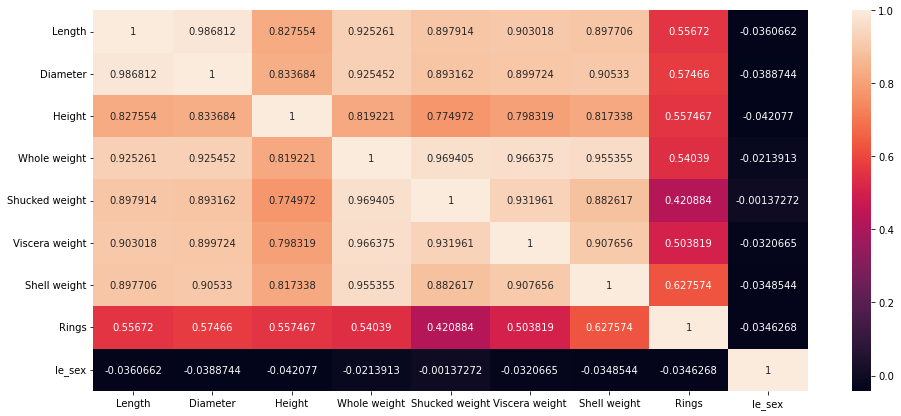

In [24]:
plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), annot=True, fmt='0.6g')

**All the columns are showing more than 50% of correlation with the Rings(Target) column except "Shucked weight"**

**Max: 0.627** - Shell weight</br>
**Min: 0.42**    - Shucked weight

In [25]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,le_sex
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.036066
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.038874
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.042077
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.021391
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.001373
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.032067
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.034854
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.034627
le_sex,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,1.000000


<AxesSubplot:>

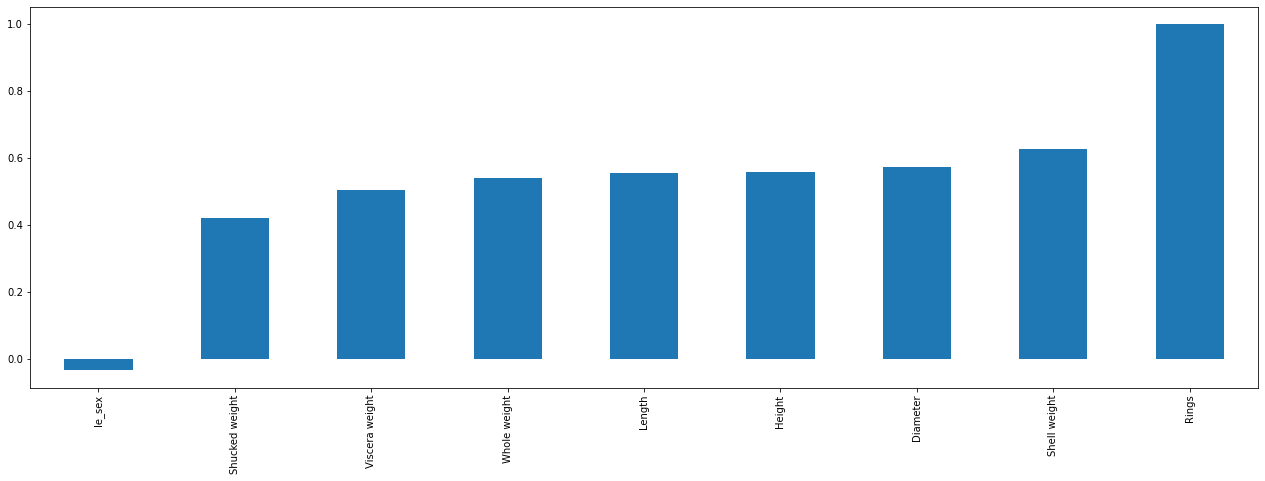

In [26]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=True).plot(kind='bar')

## Checking Skewness

In [27]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
le_sex           -0.098155
dtype: float64

Outcome of skewness: skewness threshold taken is +/- 0.65</br>
columns with skewness:</br>
**Height</br>
Shucked weight</br>**

### Checking Outliers

<AxesSubplot:xlabel='Diameter'>

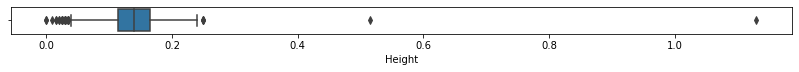

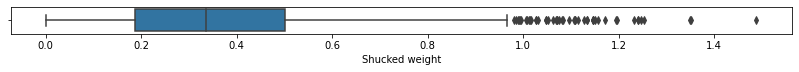

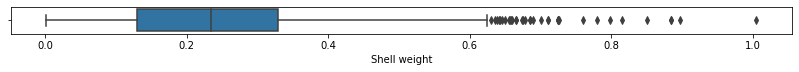

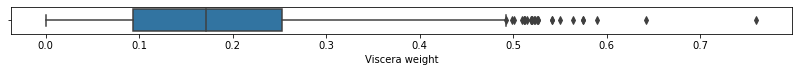

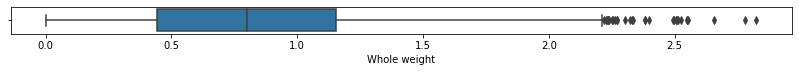

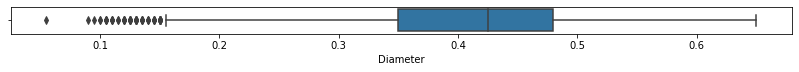

In [28]:
plt.figure(figsize=(14,0.5))
sns.boxplot(df['Height'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Shucked weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Shell weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Viscera weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Whole weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Diameter'])

## Removing Outliers

Z-score Techniques

In [29]:
df = df.drop(['Sex'],axis=1)

In [30]:
from scipy.stats import zscore
import numpy as np

z = np.abs(zscore(df))
z.shape

(4177, 9)

In [31]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [32]:
df_new = df[(z<3).all(axis=1)]

In [33]:
df_new.shape

(4027, 9)

In [34]:
z.shape

(4177, 9)

In [35]:
(4177-4027)/4177*100

3.5910940866650707

In [36]:
df_new['rings'] = df_new.Rings

In [37]:
df_new = df_new.drop(['Rings'],axis=1)

In [60]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]
x.shape

(4027, 8)

In [61]:
y.shape

(4027,)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

In [65]:
x_train.shape

(3141, 8)

In [66]:
x_test.shape

(886, 8)

In [67]:
y_train.shape

(3141,)

In [68]:
y_test.shape

(886,)

In [69]:
x.shape

(4027, 8)

In [70]:
y.shape

(4027,)

In [71]:
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
lr.score(x_train, y_train)

0.5188024020590367

## Transforming data to remove skewness

In [78]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

x = pd.DataFrame(data=x_new , columns=x.columns)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,le_sex
0,-0.697176,-0.560880,-1.155661,-0.581627,-0.539362,-0.685274,-0.587407,1.178366
1,-1.387955,-1.377993,-1.274925,-1.345491,-1.313039,-1.337807,-1.331312,1.178366
2,-0.072517,0.010879,-0.136329,-0.194601,-0.360774,-0.234698,-0.081976,-1.262467
3,-0.807853,-0.560880,-0.402577,-0.576708,-0.590907,-0.535957,-0.543684,1.178366
4,-1.499241,-1.446620,-1.508370,-1.404502,-1.380827,-1.458285,-1.480869,-0.105052
...,...,...,...,...,...,...,...,...
4022,0.266163,0.369326,0.712966,0.268354,0.219285,0.693630,0.225595,-1.262467
4023,0.528527,0.245938,-0.136329,0.433546,0.536461,0.478695,0.313377,1.178366
4024,0.638362,0.695288,1.964271,0.851443,0.902173,1.088242,0.662751,1.178366
4025,0.925474,0.832823,0.278748,0.692744,0.924337,0.877472,0.576435,-1.262467


In [80]:
x.skew().sort_values()

le_sex           -0.032885
Length            0.013414
Shucked weight    0.014398
Diameter          0.014445
Viscera weight    0.016499
Whole weight      0.016944
Height            0.020138
Shell weight      0.022629
dtype: float64

In [112]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)
    lr.fit(x_train, y_train)    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(lr.score(y_train, pred_train)*100,1) == round(lr.score(y_test.reshape(-1,1), pred_test)*100,1):
        print('at state',i)
        print("at state",i)
        print('training r2_score is ', lr.score(y_train,pred_train.reshape(-1,1))*100)
        print('testing r2_score is ', lr.score(y_test,pred_test.reshape(-1,1))*100)
        

ValueError: Expected 2D array, got 1D array instead:
array=[14 10 12 ...  7  8 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [116]:
pred_train.reshape(-1,1)

array([[10.04340076],
       [11.16689324],
       [ 9.70506218],
       ...,
       [ 7.55503914],
       [ 8.68369709],
       [ 8.30415087]])

In [107]:
pred_test

array([ 8.46706753,  9.70117517, 12.15053941, 14.69951294,  6.48861523,
        8.60706285,  9.45577709, 11.96231099,  9.696692  ,  7.39962128,
        8.83432796, 10.39961326,  7.59511558, 11.51452631,  8.11458204,
        7.1057192 , 10.08775916, 10.61564406, 10.21520517,  7.90336848,
        7.33067516, 12.25965844, 10.85734019,  9.52224648, 11.96129497,
        7.27256424, 10.75202409,  9.78257859,  7.03511123,  7.91770323,
        7.08749365, 10.57140889, 11.52527426,  8.81637264, 10.77865745,
        7.74649692,  9.76174899,  7.16272874,  7.98921014, 11.24233759,
       10.52165791, 10.4540995 , 15.29667635, 10.47885045, 10.14179424,
       14.25079919,  8.25209768, 11.92134017, 16.12827417, 10.15513313,
        8.7086417 ,  8.72716656, 10.89757843,  7.88896936,  7.26257376,
        8.60111842,  9.46971743, 11.7374365 , 11.49900139,  8.04679032,
       10.03124499,  9.41448208,  6.42478931,  9.42752132,  6.10315019,
        8.00856436, 12.55260233,  9.1098574 ,  6.73643784,  7.52

In [109]:
x_train


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,le_sex
650,-0.502733,-0.364627,-0.136329,-0.527762,-0.743211,-0.229397,-0.388765,-1.262467
2673,0.925474,0.903155,0.712966,0.906905,0.869712,1.262366,0.931270,1.178366
2676,0.985079,0.628068,0.278748,0.773111,0.956356,0.637686,0.687686,1.178366
1200,-0.582053,-0.654465,1.166215,-0.665959,-0.648880,-0.638841,-0.583021,-0.105052
3914,0.985079,0.903155,0.278748,0.888793,1.133681,0.844663,0.605349,1.178366
...,...,...,...,...,...,...,...,...
1130,1.829039,2.002533,1.321541,1.847776,2.134133,1.688460,1.519257,1.178366
1294,0.751042,0.763537,0.712966,0.980686,1.319676,0.844663,0.641292,1.178366
860,-1.016595,-1.081140,-1.274925,-0.992288,-0.941031,-1.004318,-1.042130,-0.105052
3507,-0.582053,-0.745173,-0.532733,-0.952489,-0.969103,-1.168422,-0.810698,-0.105052


In [95]:
pred_train.shape

(3141,)

In [110]:
y_test

2514     8
855      9
2495    12
2160    19
1060     7
        ..
2979     8
1135     8
3759     9
1532     5
2111     9
Name: rings, Length: 886, dtype: int64

In [111]:
pred_test

array([ 8.46706753,  9.70117517, 12.15053941, 14.69951294,  6.48861523,
        8.60706285,  9.45577709, 11.96231099,  9.696692  ,  7.39962128,
        8.83432796, 10.39961326,  7.59511558, 11.51452631,  8.11458204,
        7.1057192 , 10.08775916, 10.61564406, 10.21520517,  7.90336848,
        7.33067516, 12.25965844, 10.85734019,  9.52224648, 11.96129497,
        7.27256424, 10.75202409,  9.78257859,  7.03511123,  7.91770323,
        7.08749365, 10.57140889, 11.52527426,  8.81637264, 10.77865745,
        7.74649692,  9.76174899,  7.16272874,  7.98921014, 11.24233759,
       10.52165791, 10.4540995 , 15.29667635, 10.47885045, 10.14179424,
       14.25079919,  8.25209768, 11.92134017, 16.12827417, 10.15513313,
        8.7086417 ,  8.72716656, 10.89757843,  7.88896936,  7.26257376,
        8.60111842,  9.46971743, 11.7374365 , 11.49900139,  8.04679032,
       10.03124499,  9.41448208,  6.42478931,  9.42752132,  6.10315019,
        8.00856436, 12.55260233,  9.1098574 ,  6.73643784,  7.52